***Objectif du projet:***
    
   1 - Exploration des données et analyse statistique sur Python.<br>
   2 - Modélisation à l’aide d’algorithme d’apprentissage supervisé <br>
   3 - Restitution des résultats en soutenance 

In [44]:
### Importons les librairies necessaires au traitement 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn import ensemble, tree, linear_model
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
plt.rc('figure',figsize=(20,11))
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
print ("Libraries imported")

import folium
from folium import plugins
from folium.plugins import MarkerCluster


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
import numpy as np

Libraries imported


In [45]:
### chargeons les données
df = pd.read_csv('listings.csv')


In [46]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20210410122610,2021-04-14,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://a0.muscache.com/pictures/09da057c-0120...,2827,https://www.airbnb.com/users/show/2827,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.04
1,3109,https://www.airbnb.com/rooms/3109,20210410122610,2021-04-13,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.17
2,5396,https://www.airbnb.com/rooms/5396,20210410122610,2021-04-16,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,...,10.0,10.0,9.0,7510402838018,f,1,1,0,0,1.65
3,7397,https://www.airbnb.com/rooms/7397,20210410122610,2021-04-16,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,https://www.airbnb.com/users/show/2626,...,10.0,10.0,10.0,7510400829623,f,1,1,0,0,2.23
4,7964,https://www.airbnb.com/rooms/7964,20210410122610,2021-04-13,Large & sunny flat with balcony !,Very large & nice apartment all for you! <br /...,NaN,https://a0.muscache.com/pictures/4471349/6fb3d...,22155,https://www.airbnb.com/users/show/22155,...,10.0,10.0,10.0,7510903576564,f,1,1,0,0,0.05


In [47]:
df.shape

(63090, 74)

* comme on peut le voir, il y a:<br>
63090 lignes <br>
74 colonnes

In [48]:
### pour mener à bien notre analyse, verifions quel type de donner avons-nous en face
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63090 entries, 0 to 63089
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            63090 non-null  int64  
 1   listing_url                                   63090 non-null  object 
 2   scrape_id                                     63090 non-null  int64  
 3   last_scraped                                  63090 non-null  object 
 4   name                                          63028 non-null  object 
 5   description                                   61681 non-null  object 
 6   neighborhood_overview                         37484 non-null  object 
 7   picture_url                                   63089 non-null  object 
 8   host_id                                       63090 non-null  int64  
 9   host_url                                      63090 non-null 

In [49]:
### maitenant que savons cela, verirfions s'il ya des donnes dupliqueés et manquantes et les ecarter
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [50]:
df.shape ### pas de données dupliquées

(63090, 74)

In [51]:
df.isnull()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63085,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,True
63086,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,True
63087,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,True
63088,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True


In [52]:
df.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               62
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               15306
Length: 74, dtype: int64

***Nettoyons les données***
- Nous gardons les variables que ont plus d'impact sur le niveau du prix

In [53]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [54]:
df.bathrooms.isnull().sum()

63090

In [55]:
### verifier le nombre des valeurs de manquantes
def graphic(df):
    """
    input: df,
    ouput: Graph des NaN des colonnes
    """
    plt.rcParams['figure.figsize'] = (10, 10)
    pd.DataFrame(df.isna().mean().round(4) * 100, columns=['NaN en %']).plot(kind='bar')
    plt.show()

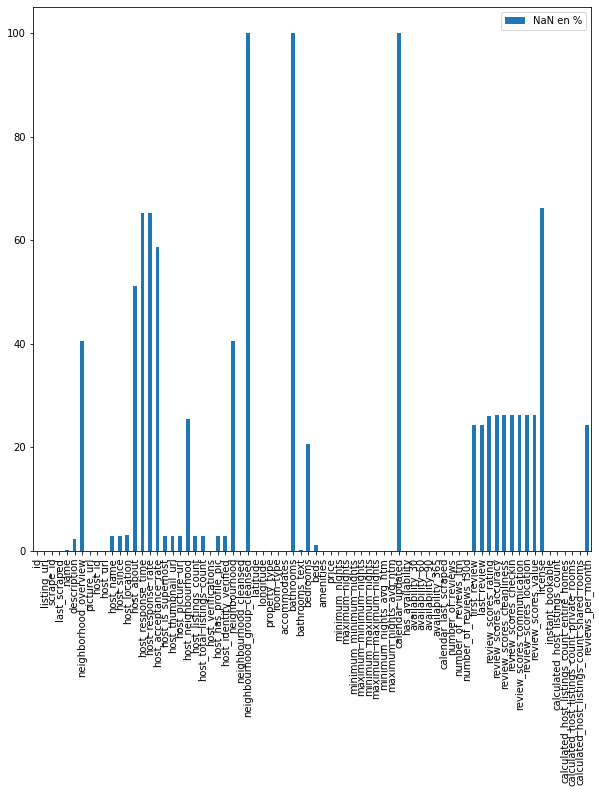

In [56]:
graphic(df)

In [57]:
### supprimer les conlones inutiles à notre analyse 
df.drop(['name','id','host_name', 'scrape_id', 'last_scraped', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_about', 'host_picture_url', 'host_listings_count', 'host_has_profile_pic', 'host_thumbnail_url', 'calendar_last_scraped',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms',
         'listing_url', 'description', 'neighborhood_overview', 'picture_url',
       'host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_neighbourhood',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified', 'neighbourhood_group_cleansed', 
        'bathrooms','bathrooms_text','beds',
        'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
        'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',], axis=1, inplace=True)

In [58]:
df.columns

Index(['host_is_superhost', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_l30d',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63090 entries, 0 to 63089
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_is_superhost               61336 non-null  object 
 1   neighbourhood                   37484 non-null  object 
 2   neighbourhood_cleansed          63090 non-null  object 
 3   latitude                        63090 non-null  float64
 4   longitude                       63090 non-null  float64
 5   property_type                   63090 non-null  object 
 6   room_type                       63090 non-null  object 
 7   accommodates                    63090 non-null  int64  
 8   bedrooms                        50067 non-null  float64
 9   amenities                       63090 non-null  object 
 10  price                           63090 non-null  object 
 11  minimum_nights                  63090 non-null  int64  
 12  maximum_nights                  

In [60]:
df.head()

,host_is_superhost,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,...,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_l30d,calculated_host_listings_count,reviews_per_month
0,f,NaN,Entrepôt,48.86957,2.36127,Entire loft,Entire home/apt,4,2.0,"[""Essentials"", ""Kitchen"", ""Heating"", ""Host gre...",...,3,1125,0,0,12,286,1,0,1,0.04
1,f,"Paris, Île-de-France, France",Observatoire,48.83191,2.31870,Entire apartment,Entire home/apt,2,NaN,"[""Smoke alarm"", ""Dishes and silverware"", ""Hair...",...,2,30,30,60,90,365,9,0,1,0.17
2,f,"Paris, Ile-de-France, France",Hôtel-de-Ville,48.85247,2.35835,Entire apartment,Entire home/apt,2,NaN,"[""Essentials"", ""TV with standard cable"", ""Dish...",...,1,1125,18,47,58,58,237,3,1,1.65
3,t,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire apartment,Entire home/apt,4,2.0,"[""Essentials"", ""TV with standard cable"", ""Dish...",...,10,130,13,39,64,327,272,1,1,2.23
4,f,NaN,Opéra,48.87417,2.34245,Entire apartment,Entire home/apt,2,1.0,"[""Essentials"", ""TV with standard cable"", ""Kitc...",...,6,365,30,60,90,365,6,0,1,0.05


In [61]:
### changer les valeurs manquantes par 0 pour 'reviews_per_month'
df['reviews_per_month'].fillna(0, inplace=True)
df['bedrooms'].fillna(0, inplace=True)
#df['neighbourhood'].fillna(0, inplace=True)
#df['neighbourhood_cleansed'].fillna(0, inplace=True)

In [62]:
##df.dropna(how='any',inplace=True) 

### verifiers les valeurs manquantes 
df.isnull().sum()

host_is_superhost                  1754
neighbourhood                     25606
neighbourhood_cleansed                0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bedrooms                              0
amenities                             0
price                                 0
minimum_nights                        0
maximum_nights                        0
availability_30                       0
availability_60                       0
availability_90                       0
availability_365                      0
number_of_reviews                     0
number_of_reviews_l30d                0
calculated_host_listings_count        0
reviews_per_month                     0
dtype: int64

In [63]:
### Extraire $ de du prix et remplacer la virguler
df['price'] = df['price'].str.replace(',', '').str.replace('$', '').astype(float)

<ipython-input-63-1944fc048db9>:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [64]:
df.corr()

,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_l30d,calculated_host_listings_count,reviews_per_month
latitude,1.000000,0.087185,-0.015485,-0.006348,-0.019311,-0.010751,0.007539,-0.015393,-0.021995,-0.025562,-0.038795,-0.019627,-0.007533,-0.013535,-0.020088
longitude,0.087185,1.000000,-0.024803,-0.012608,-0.095122,0.000712,-0.000683,-0.065932,-0.070590,-0.072423,-0.083226,0.001664,-0.008779,-0.033116,-0.009157
accommodates,-0.015485,-0.024803,1.000000,0.607550,0.298279,-0.006547,-0.004177,0.071819,0.070767,0.072306,0.114928,0.029714,0.020241,0.081099,0.039040
bedrooms,-0.006348,-0.012608,0.607550,1.000000,0.229437,-0.005078,-0.000315,0.039993,0.039762,0.041208,0.069909,0.015116,-0.012762,0.035473,-0.005218
price,-0.019311,-0.095122,0.298279,0.229437,1.000000,0.003838,-0.001221,0.103030,0.107517,0.109929,0.135875,-0.007054,-0.017768,0.043570,-0.016882
minimum_nights,-0.010751,0.000712,-0.006547,-0.005078,0.003838,1.000000,0.008305,0.033118,0.033756,0.035582,0.053058,-0.007682,-0.011336,0.008978,-0.020217
maximum_nights,0.007539,-0.000683,-0.004177,-0.000315,-0.001221,0.008305,1.000000,-0.002955,-0.003035,-0.003121,-0.002347,-0.002304,-0.000172,0.000867,-0.002041
availability_30,-0.015393,-0.065932,0.071819,0.039993,0.103030,0.033118,-0.002955,1.000000,0.977625,0.951410,0.740354,0.148180,0.111678,0.030680,0.182245
availability_60,-0.021995,-0.070590,0.070767,0.039762,0.107517,0.033756,-0.003035,0.977625,1.000000,0.989925,0.782535,0.154502,0.114241,0.036935,0.190365
availability_90,-0.025562,-0.072423,0.072306,0.041208,0.109929,0.035582,-0.003121,0.951410,0.989925,1.000000,0.810561,0.158158,0.111677,0.044609,0.192868


***Visualisation des nos données dans uen matrice de correlation*** 

<AxesSubplot:>

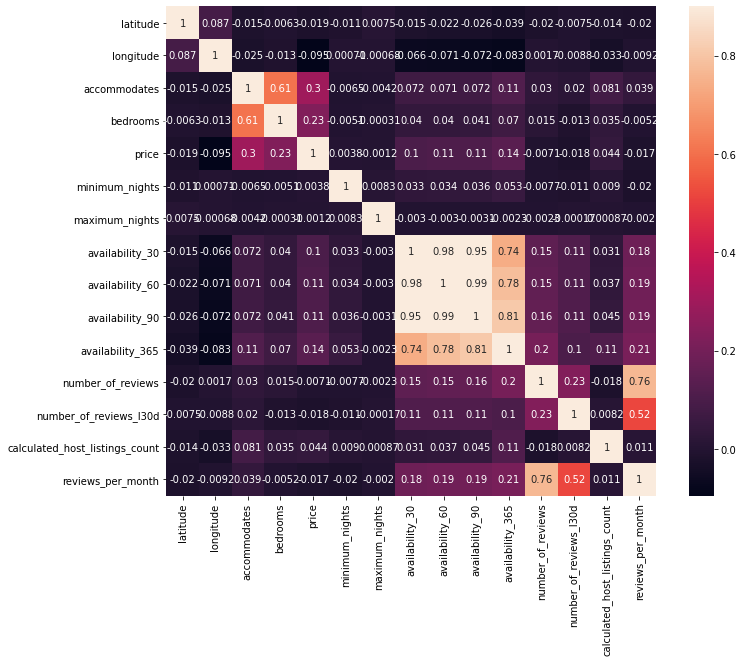

In [65]:
mat_corr = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(mat_corr, vmax=0.9, annot=True, square=True)

In [66]:
### les diffrents quartiers arrondissements d'ile de france
df['neighbourhood_cleansed'].value_counts()

Buttes-Montmartre      6971
Popincourt             5918
Vaugirard              4782
Entrepôt               4502
Batignolles-Monceau    4168
Ménilmontant           3652
Buttes-Chaumont        3641
Passy                  3176
Opéra                  3099
Reuilly                2738
Temple                 2736
Observatoire           2491
Gobelins               2219
Bourse                 2132
Panthéon               2111
Hôtel-de-Ville         1999
Luxembourg             1957
Élysée                 1759
Palais-Bourbon         1685
Louvre                 1354
Name: neighbourhood_cleansed, dtype: int64

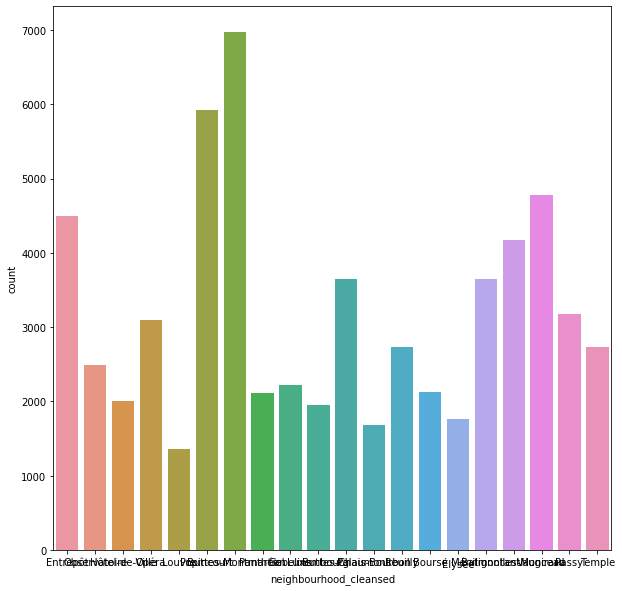

In [67]:
ax = sns.countplot(data=df, x="neighbourhood_cleansed")##neighbourhood_group_cleansed 

In [68]:
local=pd.DataFrame(df['neighbourhood_cleansed'].value_counts()).reset_index().rename(columns={'index': 'neighbourhood_cleansed','neighbourhood_cleansed':'count'})
local

,neighbourhood_cleansed,count
0,Buttes-Montmartre,6971
1,Popincourt,5918
2,Vaugirard,4782
3,Entrepôt,4502
4,Batignolles-Monceau,4168
5,Ménilmontant,3652
6,Buttes-Chaumont,3641
7,Passy,3176
8,Opéra,3099
9,Reuilly,2738


In [69]:
fig = go.Figure(go.Bar(
    x=local['neighbourhood_cleansed'],y=local['count'],
    marker={'color': local['count'], 
    'colorscale': 'Viridis'},  
    text=local['count'],
    textposition = "outside",
))
fig.update_layout(xaxis_title="Neighbourhood",yaxis_title="count")
fig.show()

cette figure illustre la concentration des locations airbnb dans ile de france
- il ya plus hotel airbnb au 18eme, 11eme, 15emm par rapport au louvre (1ER arro) 

##### Analyse du Type Room ou logement sur graphique

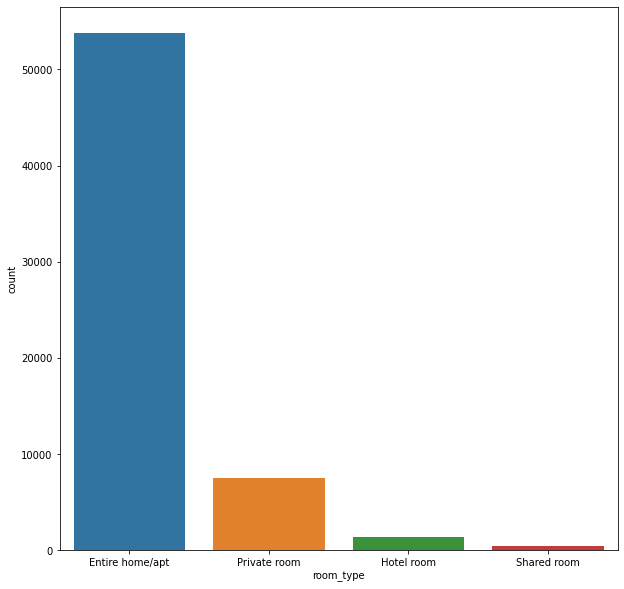

In [70]:
ax = sns.countplot(x="room_type", data=df)

On constate bien que ce type de logement se concentre dans les home/appartemt et laocation privé par rapport au maisons partagées et Hotel 

###### Analyse de disponibilité annuelle des airbnb selon les quatiers

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63090 entries, 0 to 63089
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_is_superhost               61336 non-null  object 
 1   neighbourhood                   37484 non-null  object 
 2   neighbourhood_cleansed          63090 non-null  object 
 3   latitude                        63090 non-null  float64
 4   longitude                       63090 non-null  float64
 5   property_type                   63090 non-null  object 
 6   room_type                       63090 non-null  object 
 7   accommodates                    63090 non-null  int64  
 8   bedrooms                        63090 non-null  float64
 9   amenities                       63090 non-null  object 
 10  price                           63090 non-null  float64
 11  minimum_nights                  63090 non-null  int64  
 12  maximum_nights                  

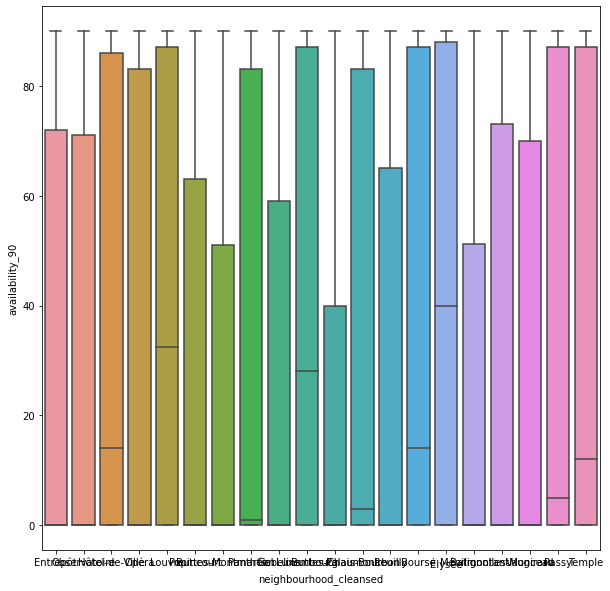

In [72]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_cleansed',y='availability_90')

##### Disponibilité selon le type

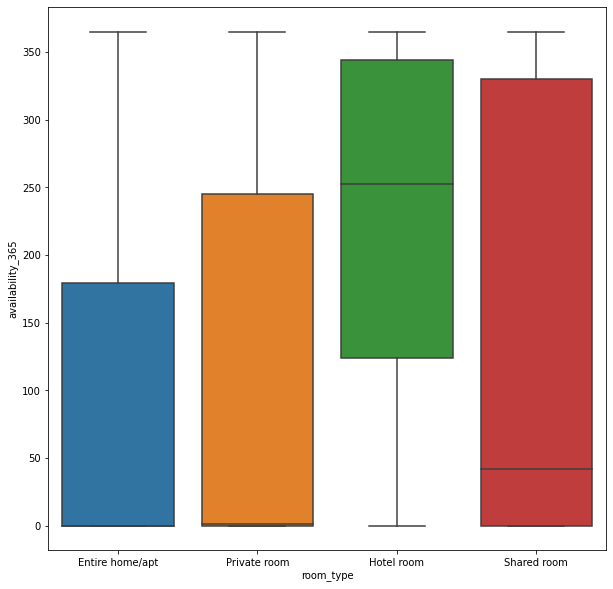

In [73]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='room_type',y='availability_365')

##### Carte d'ile de france en utilsant les variable ('longitude' et latitude')

In [74]:
fig = px.scatter(df, x='longitude', y='latitude',
                 color='neighbourhood_cleansed')  
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()

#### Partie 2: Machine learning

***Etape 1:*** Featuraisation du model pour 365 jours

In [75]:
df.columns

Index(['host_is_superhost', 'neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_l30d',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [76]:
feature=['neighbourhood_cleansed', 'bedrooms', 'room_type','reviews_per_month', 'price', 'calculated_host_listings_count','minimum_nights', 'accommodates', 'number_of_reviews' , 'number_of_reviews_l30d', 'availability_365']

In [77]:
data=df[feature]
data.head()

,neighbourhood_cleansed,bedrooms,room_type,reviews_per_month,price,calculated_host_listings_count,minimum_nights,accommodates,number_of_reviews,number_of_reviews_l30d,availability_365
0,Entrepôt,2.0,Entire home/apt,0.04,125.0,1,3,4,1,0,286
1,Observatoire,0.0,Entire home/apt,0.17,60.0,1,2,2,9,0,365
2,Hôtel-de-Ville,0.0,Entire home/apt,1.65,47.0,1,1,2,237,3,58
3,Hôtel-de-Ville,2.0,Entire home/apt,2.23,90.0,1,10,4,272,1,327
4,Opéra,1.0,Entire home/apt,0.05,130.0,1,6,2,6,0,365


***Etape 2*** : Encoder les variables categorielles

In [78]:
data['room_type']=data['room_type'].factorize()[0]
data['neighbourhood_cleansed']=data['neighbourhood_cleansed'].factorize()[0]
data.head()

,neighbourhood_cleansed,bedrooms,room_type,reviews_per_month,price,calculated_host_listings_count,minimum_nights,accommodates,number_of_reviews,number_of_reviews_l30d,availability_365
0,0,2.0,0,0.04,125.0,1,3,4,1,0,286
1,1,0.0,0,0.17,60.0,1,2,2,9,0,365
2,2,0.0,0,1.65,47.0,1,1,2,237,3,58
3,2,2.0,0,2.23,90.0,1,10,4,272,1,327
4,3,1.0,0,0.05,130.0,1,6,2,6,0,365


##### Train test split

In [79]:
x = data.copy().drop('price', axis = 1)
y = data['price'].copy()
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.1, random_state=105)

***Etape 3:*** Modelisation

#### Baseline

In [80]:
baseline = y_train.median() #median train
print("Si nous prenons simplement la valeur médiane, notre base de référence, nous dirons qu'une nuitée à paris coûte € d'euros: " + str(baseline))

Si nous prenons simplement la valeur médiane, notre base de référence, nous dirons qu'une nuitée à paris coûte € d'euros: 80.0


#### Machine leanrning

##### 1.  Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred=(linreg.predict(x_test))

print('R-squared train score: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_test, y_test)))
#print("Prediction :", y_pred)
#print("Valeur Actuelle :", y_test)
#error_airbnb = pd.DataFrame({
        #'Valueur Actuelle': np.array(y_test).flatten(),
        #'Prediction': y_pred.flatten()})
#print(error_airbnb.head().to_string())



R-squared train score: 0.108
R-squared test score: 0.122


##### 2. Decision Tree Regressor

In [82]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)

print('R-squared score (training): {:.3f}'.format(DTree.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(x_test, y_test)))
error_airbnb = pd.DataFrame({
        'Valueur Actuelle': np.array(y_test).flatten(),
        'Prediction': y_pred.flatten()})
print(error_airbnb.head().to_string())

R-squared score (training): 0.361
R-squared score (test): 0.089
   Valueur Actuelle  Prediction
0              40.0   87.288212
1             145.0  108.276359
2             214.0  186.966388
3              28.0   57.248787
4             311.0  168.975930


#### 3.Random forest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

print('R-squared score (training): {:.3f}'.format(regressor.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(x_test, y_test)))
error_airbnb = pd.DataFrame({
        'Valueur Actuelle': np.array(y_test),#.flatten(),
        'Prediction': y_pred.flatten()})
print(error_airbnb.head().to_string())

R-squared score (training): 0.858
R-squared score (test): 0.181
   Valueur Actuelle  Prediction
0              40.0   87.288212
1             145.0  108.276359
2             214.0  186.966388
3              28.0   57.248787
4             311.0  168.975930


##### Etape: Featuraisation pour une prediction prix à 3 mois

In [84]:
feature1=['neighbourhood_cleansed','room_type','reviews_per_month', 'price', 'calculated_host_listings_count','minimum_nights', 'accommodates', 'availability_90']

In [85]:
data2=df[feature1]
data2.head()

,neighbourhood_cleansed,room_type,reviews_per_month,price,calculated_host_listings_count,minimum_nights,accommodates,availability_90
0,Entrepôt,Entire home/apt,0.04,125.0,1,3,4,12
1,Observatoire,Entire home/apt,0.17,60.0,1,2,2,90
2,Hôtel-de-Ville,Entire home/apt,1.65,47.0,1,1,2,58
3,Hôtel-de-Ville,Entire home/apt,2.23,90.0,1,10,4,64
4,Opéra,Entire home/apt,0.05,130.0,1,6,2,90


In [86]:
####: Encoder les variables categorielles
data2['room_type']=data2['room_type'].factorize()[0]
data2['neighbourhood_cleansed']=data2['neighbourhood_cleansed'].factorize()[0]
data2.head()

,neighbourhood_cleansed,room_type,reviews_per_month,price,calculated_host_listings_count,minimum_nights,accommodates,availability_90
0,0,0,0.04,125.0,1,3,4,12
1,1,0,0.17,60.0,1,2,2,90
2,2,0,1.65,47.0,1,1,2,58
3,2,0,2.23,90.0,1,10,4,64
4,3,0,0.05,130.0,1,6,2,90


In [87]:
###Train test split
y = data2['price']
x= data2.drop(['price'],axis=1)
x_train

,neighbourhood_cleansed,bedrooms,room_type,reviews_per_month,calculated_host_listings_count,minimum_nights,accommodates,number_of_reviews,number_of_reviews_l30d,availability_365
6553,8,1.0,0,0.03,1,2,3,2,0,0
401,15,2.0,0,0.77,2,3,3,33,0,0
27172,17,1.0,0,0.16,1,5,4,7,0,159
32017,12,3.0,0,0.06,1,5,6,2,0,71
4852,8,1.0,0,0.08,1,12,4,6,0,0
...,...,...,...,...,...,...,...,...,...,...
39712,10,1.0,1,0.86,3,1,1,22,0,0
48356,0,1.0,0,1.00,1,4,2,19,0,0
73,2,1.0,0,0.34,1,2,2,41,0,1
43798,3,0.0,0,0.39,2,2,3,8,0,0


#### Etape 3B: Modelisation


#### 1. Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred=(linreg.predict(x_test))

print('R-squared train score: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_test, y_test)))

R-squared train score: 0.108
R-squared test score: 0.122


In [89]:
#### Lasso Regrission

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10,max_iter = 10000)
lasso.fit(x_train, y_train)

print('R-squared score (training): {:.3f}'.format(lasso.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso.score(x_test, y_test)))

R-squared score (training): 0.101
R-squared score (test): 0.109


#### 2. Decision Tree Regressor

In [90]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)

print('R-squared score (training): {:.3f}'.format(DTree.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(x_test, y_test)))

R-squared score (training): 0.361
R-squared score (test): 0.089


#### 3.Random forest Regressor

In [91]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()
regressor.fit(x_train, y_train)

print('R-squared score (training): {:.3f}'.format(regressor.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(x_test, y_test)))

R-squared score (training): 0.891
R-squared score (test): 0.062
